<a href="https://colab.research.google.com/github/ohsterik/BackpackNotebooks/blob/main/BackpackMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multilayer-Perceptron Regressor Model Pipeline

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
# initialize dataframe
df = pd.concat(
    [pd.read_csv('/content/drive/MyDrive/Projects/KaggleBackpack/train.csv'),
     pd.read_csv('/content/drive/MyDrive/Projects/KaggleBackpack/training_extra.csv')],
    ignore_index=True
)

# Create pipeline and model

In [33]:
# Map Binary Columns
df['Laptop Compartment'] = df['Laptop Compartment'].map({'Yes': 1, 'No': 0}).fillna(0)
df['Waterproof'] = df['Waterproof'].map({'Yes': 1, 'No': 0}).fillna(0)

# Map Size Column
df['Size'] = df['Size'].map({'Small': 1, 'Medium': 2, 'Large': 3}).fillna(2)

# Define imputers and encoders for preprocessor
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))#,
    #('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define numerical and categorical columns
numeric_features = ['Compartments', 'Weight Capacity (kg)']
categorical_features = ['Brand', 'Material', 'Style', 'Color']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Initialize pipeline with model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(
        max_iter=200,
        verbose=True,
        hidden_layer_sizes=(100, 10),
        early_stopping=True,
        learning_rate='adaptive'
    ))
])

# Train model

In [34]:
# Split data
X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit model
pipeline.fit(X_train, y_train)

Iteration 1, loss = 779.04192375
Validation score: 0.001060
Iteration 2, loss = 757.92575913
Validation score: 0.000400
Iteration 3, loss = 757.81921719
Validation score: 0.000795
Iteration 4, loss = 757.75972109
Validation score: 0.000501
Iteration 5, loss = 757.68995190
Validation score: 0.000416
Iteration 6, loss = 757.60459464
Validation score: 0.000923
Iteration 7, loss = 757.49146138
Validation score: 0.000119
Iteration 8, loss = 757.48248608
Validation score: 0.000419
Iteration 9, loss = 757.47038422
Validation score: 0.000653
Iteration 10, loss = 757.44828264
Validation score: 0.001013
Iteration 11, loss = 757.40008974
Validation score: 0.001022
Iteration 12, loss = 757.34195132
Validation score: 0.000888
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Compartments',
                                                   'Weight Capacity (kg)']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Brand', 'Material', 'Style',
                                                   'Color'])])),
                ('regressor',
                 MLPRegressor(early_stopping=True, hidden_layer_sizes=(100, 10),
                              learning_rate='adaptive', verbose=True))])

# Evaluate Model

In [35]:
train_pred = pipeline.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

test_pred = pipeline.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print(f"Train Score: {train_rmse}")
print(f"Test Score: {test_rmse}")

Train Score: 38.911803911805855
Test Score: 38.93897122492746


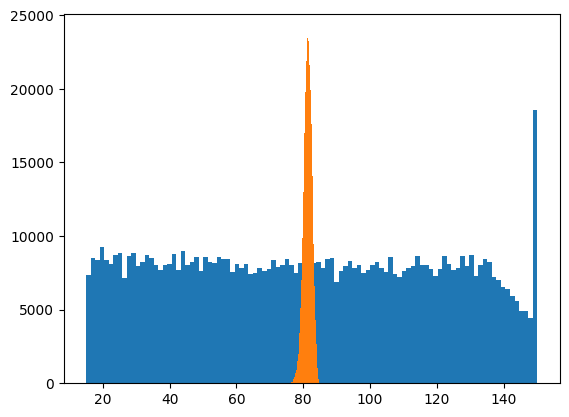

In [36]:
plt.hist(y_test, bins=100)
plt.hist(test_pred, bins=100);